In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_excel(r'/Users/dhruvpandit/Documents/GitHub/Projects/Macroeconometrics/macrodata.xlsm')
data.rename(columns={' GBP-EOM-VAL-CUR':'GBP',
                            'USD-EOM-VAL-CUR': 'USD',
                            'CPI-YOY-ROC-PERC': 'CPI',
                            'IR-L-IND-CONCRED-PERC' : 'IR-C', 'IR-L-IND-HOU-PERC' : 'IR-H',
       'GAC-BM-MIL-EUR':'GAC'}, inplace=True)
data.head()
# Separate features and target variable
X = data[['GAC', 'IR-H', 'IR-C', 'GBP', 'USD']]
y = data['CPI']
data.set_index('Date', inplace=True)
# Handle missing values if any
X.dropna(inplace=True)  # Replace missing values with mean
y.dropna(inplace=True)  # Replace missing values with mean

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/var/folders/6c/vby383sn3xlg0j_c253f0sf40000gn/T/ipykernel_37180/2086289619.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)  # Replace missing values with mean


In [11]:
data

,GBP,USD,CPI,IR-C,IR-H,GAC
Date,,,,,,
2003-01-31,0.65570,10816.0000,4.0,9.91,4.40,-859.61
2003-02-28,0.68420,10782.0000,4.1,9.86,4.25,-754.55
2003-03-31,0.68960,10895.0000,3.7,9.73,4.08,-1202.52
2003-04-30,0.69700,11131.0000,3.7,10.05,4.02,-774.65
2003-05-31,0.71960,11822.0000,3.6,10.26,4.03,-1006.67
...,...,...,...,...,...,...
2022-10-31,0.86115,0.9914,10.1,8.06,2.86,-2346.59
2022-11-30,0.86488,10376.0000,9.9,7.98,3.09,-2042.42
2022-12-31,0.88693,10666.0000,9.6,7.97,3.24,-2453.69


In [12]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Create an XGBoost regressor
xgb_regressor = xgb.XGBRegressor(
    learning_rate=0.05,  # Adjust learning rate
    n_estimators=200,   # Adjust number of trees
    max_depth=3,        # Adjust maximum tree depth
    random_state=42
)

# Train the model
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 1.28
R-squared: 0.77


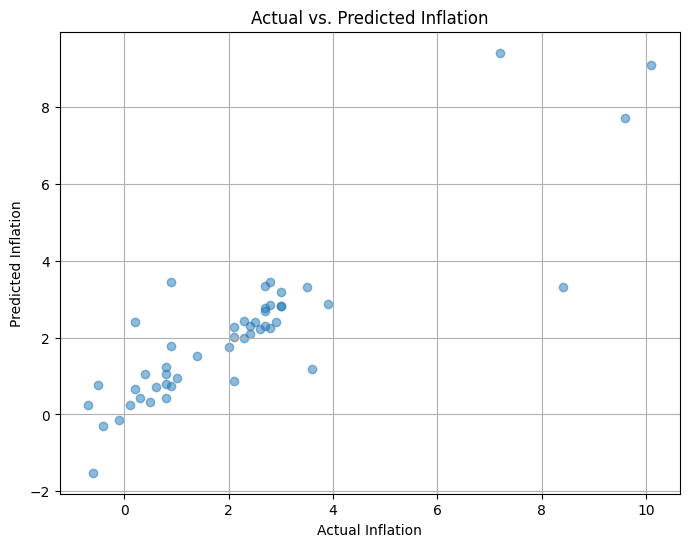

In [13]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Inflation')
plt.xlabel('Actual Inflation')
plt.ylabel('Predicted Inflation')
plt.grid(True)
plt.show()


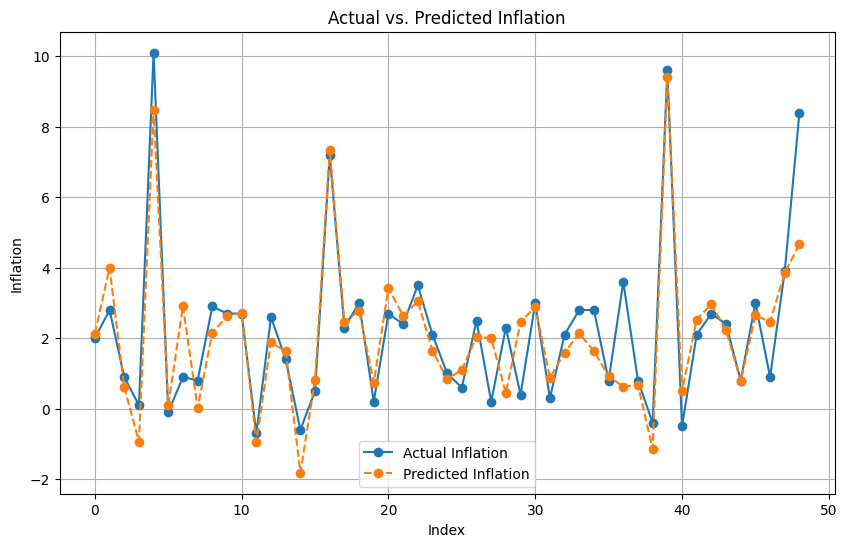

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Create an array of indices for the x-axis
indices = np.arange(len(y_test))

# Create a figure and axis
plt.figure(figsize=(10, 6))
plt.plot(indices, y_test, label='Actual Inflation', marker='o', linestyle='-')
plt.plot(indices, y_pred, label='Predicted Inflation', marker='o', linestyle='--')
plt.title('Actual vs. Predicted Inflation')
plt.xlabel('Index')
plt.ylabel('Inflation')
plt.legend()
plt.grid(True)
plt.show()


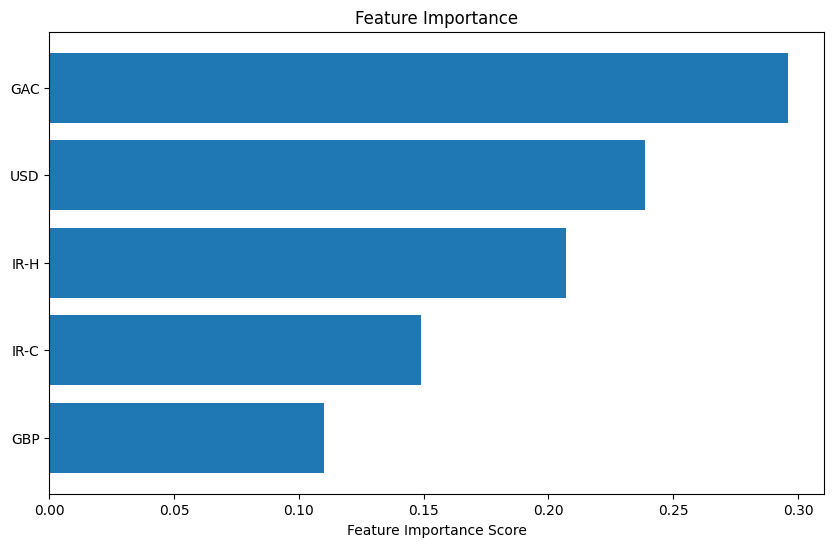

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance scores from the best XGBoost model
feature_importance_scores = best_xgb_regressor.feature_importances_

# Get the names of the features (assuming your features are in a pandas DataFrame)
feature_names = X_train.columns

# Sort feature importance scores and feature names in descending order of importance
sorted_idx = np.argsort(feature_importance_scores)[::-1]
sorted_scores = feature_importance_scores[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_scores, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance Score')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to display most important features at the top
plt.show()

In [8]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Create an XGBoost regressor
xgb_regressor = xgb.XGBRegressor(random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'n_estimators': [100, 200, 300],   # Number of trees
    'max_depth': [3, 4, 5],            # Maximum tree depth
    'min_child_weight': [1, 2, 3],     # Minimum child weight
    'gamma': [0, 0.1, 0.2],            # Regularization parameter
    'subsample': [0.8, 0.9, 1.0],      # Fraction of samples used for training
    'colsample_bytree': [0.8, 0.9, 1.0]  # Fraction of features used for training
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the model with grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_xgb_regressor = xgb.XGBRegressor(random_state=42, **best_params)
best_xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


KeyboardInterrupt: 

In [19]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
import numpy as np

# Create an XGBoost regressor
xgb_regressor = xgb.XGBRegressor(random_state=42)

# Define a random search parameter distribution
param_dist = {
    'learning_rate': stats.uniform(0.01, 0.3),  # Uniform distribution for learning rate
    'n_estimators': np.arange(50, 500, 10),    # Range of values for number of trees
    'max_depth': np.arange(3, 11),            # Range of values for maximum tree depth
    'min_child_weight': np.arange(1, 10),     # Range of values for minimum child weight
    'gamma': stats.uniform(0, 0.3),           # Uniform distribution for gamma
    'subsample': stats.uniform(0.5, 0.5),     # Uniform distribution for subsample
    'colsample_bytree': stats.uniform(0.5, 0.5)  # Uniform distribution for colsample_bytree
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=xgb_regressor, param_distributions=param_dist, n_iter=100, cv=3,
                                   scoring='neg_mean_squared_error', random_state=42)

# Fit the model with random search
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Train the model with the best hyperparameters
best_xgb_regressor = xgb.XGBRegressor(random_state=42, **best_params)
best_xgb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgb_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Best Hyperparameters: {'colsample_bytree': 0.7962072844310213, 'gamma': 0.013935123815999317, 'learning_rate': 0.1922634555704315, 'max_depth': 7, 'min_child_weight': 9, 'n_estimators': 430, 'subsample': 0.5066324805799333}
Mean Squared Error: 1.13
R-squared: 0.79
